In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [27]:
pd.set_option('future.no_silent_downcasting', True)

In [28]:
%pip install scikit-learn
from sklearn import linear_model 


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
#Loading dataset
df = pd.read_excel(
    'data/Raw_data.xlsx',
    sheet_name = 'Data resource'
)
df

,Country Name,Country Code,Series Name,Series Code,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,total sum
0,Algeria,DZA,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.022031,0.021734,0.00054,0.025459,0.062496,0.000002,...,0.702589,-0.324012,1.023696,0.72326,0.838207,0.804144,0.784883,0.531681,0.039183,NaN
1,Algeria,DZA,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,13018265.020316,12091646.796864,334914.564225,11638686.452434,30000000,1000,...,1502206170.55838,-537792920.921856,1638263953.77737,1230243450.87889,1466116068.03412,1381200049.59264,1143918159.62919,869151161.725393,75197017.924617,NaN
2,Algeria,DZA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,..,..,..,34.904,33.356,32.808,...,36.58,37.034,37.599,37.496,37.415,37.369,34.53,35.35,35.895,NaN
3,Algeria,DZA,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,..,..,..,..,..,..,...,41.15,41.71,41.87,41.77,..,..,..,..,..,NaN
4,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,99.274551,99.356194,99.433693,99.530022,99.637741,99.5,99.718773,99.787827,..,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#list all mentioned countries
df['Country Name'].value_counts()


Country Name
Algeria                                                                                                      67
Libya                                                                                                        67
Paraguay                                                                                                     67
Panama                                                                                                       67
Pakistan                                                                                                     67
                                                                                                             ..
Dòng chảy FDI của VN bắt đâu xuất hiện vào năm 1985 --> tra gg để tìm thêm nguồn gốc lịch sử của cái này.     1
Từ năm 1960 - 1970, chỉ có 7 quốc gia lân cận VN xuất hiện dòng vốn FDI --> họ phát triển từ sớm              1
Last Updated: 10/26/2023                                                                   

In [31]:
#Filter all the data Vietnam
vietnam_df = df[df['Country Name']=='Viet Nam']
vietnam_df.info()
#Check null value
vietnam_df

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 6633 to 6699
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  67 non-null     object 
 1   Country Code  67 non-null     object 
 2   Series Name   67 non-null     object 
 3   Series Code   67 non-null     object 
 4   1988          67 non-null     object 
 5   1989          67 non-null     object 
 6   1990          67 non-null     object 
 7   1991          67 non-null     object 
 8   1992          67 non-null     object 
 9   1993          67 non-null     object 
 10  1994          67 non-null     object 
 11  1995          67 non-null     object 
 12  1996          67 non-null     object 
 13  1997          67 non-null     object 
 14  1998          67 non-null     object 
 15  1999          67 non-null     object 
 16  2000          67 non-null     object 
 17  2001          67 non-null     object 
 18  2002          67 non-null     ob

,Country Name,Country Code,Series Name,Series Code,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,total sum
6633,Viet Nam,VNM,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.030208,0.064672,2.781323,3.902797,4.803348,7.027593,...,3.940862,4.931907,4.900893,5.011487,4.998283,4.821075,4.558362,4.277081,4.378644,NaN
6634,Viet Nam,VNM,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,7679999.9,4070000,180000000,375190278,473945856,926303714.9,...,9200000000,11800000000,12600000000,14100000000,15500000000,16120000000,15800000000,15660000000,17900000000,2.100591e+11
6635,Viet Nam,VNM,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,..,..,..,75.591,75.466,75.181,...,76.069,75.772,75.144,74.706,74.733,74.359,71.741,71.165,72.012,NaN
6636,Viet Nam,VNM,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,..,77.21,..,..,..,..,...,77.04,77.2,76.56,76.13,75.61,75.63,73.28,72.9,73.08,NaN
6637,Viet Nam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,99.2,99.254211,99.2,100,100,99.4,99.8,100,..,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,Viet Nam,VNM,"Time to import, documentary compliance (hours)",IC.IMP.TMDC,..,..,..,..,..,..,...,106,106,76,76,76,76,..,..,..,NaN
6696,Viet Nam,VNM,Time to obtain an electrical connection (days),IC.ELC.DURS,..,..,..,..,..,..,...,..,18.5,..,..,..,..,..,..,..,NaN
6697,Viet Nam,VNM,Time to prepare and pay taxes (hours),IC.TAX.DURS,..,..,..,..,..,..,...,872,770,540,498,498,384,..,..,..,NaN
6698,Viet Nam,VNM,Trade (% of GDP),NE.TRD.GNFS.ZS,18.950487,57.904462,81.315698,66.946952,73.576885,66.212267,...,135.410512,144.91422,145.409507,160.980072,164.66394,164.704221,163.245857,186.468183,..,NaN


In [32]:
#replace special char to N/A
vietnam_df.iloc[:, 4:] = vietnam_df.iloc[:, 4:].replace('..',np.nan)
#check the null value
vietnam_df.isnull().sum()
vietnam_df

,Country Name,Country Code,Series Name,Series Code,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,total sum
6633,Viet Nam,VNM,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.030208,0.064672,2.781323,3.902797,4.803348,7.027593,...,3.940862,4.931907,4.900893,5.011487,4.998283,4.821075,4.558362,4.277081,4.378644,NaN
6634,Viet Nam,VNM,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,7679999.9,4070000,180000000,375190278,473945856,926303714.9,...,9200000000,11800000000,12600000000,14100000000,15500000000,16120000000,15800000000,15660000000,17900000000,2.100591e+11
6635,Viet Nam,VNM,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,75.591,75.466,75.181,...,76.069,75.772,75.144,74.706,74.733,74.359,71.741,71.165,72.012,NaN
6636,Viet Nam,VNM,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,NaN,77.21,NaN,NaN,NaN,NaN,...,77.04,77.2,76.56,76.13,75.61,75.63,73.28,72.9,73.08,NaN
6637,Viet Nam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.2,99.254211,99.2,100,100,99.4,99.8,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,Viet Nam,VNM,"Time to import, documentary compliance (hours)",IC.IMP.TMDC,NaN,NaN,NaN,NaN,NaN,NaN,...,106,106,76,76,76,76,NaN,NaN,NaN,NaN
6696,Viet Nam,VNM,Time to obtain an electrical connection (days),IC.ELC.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,Viet Nam,VNM,Time to prepare and pay taxes (hours),IC.TAX.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,872,770,540,498,498,384,NaN,NaN,NaN,NaN
6698,Viet Nam,VNM,Trade (% of GDP),NE.TRD.GNFS.ZS,18.950487,57.904462,81.315698,66.946952,73.576885,66.212267,...,135.410512,144.91422,145.409507,160.980072,164.66394,164.704221,163.245857,186.468183,NaN,NaN


In [33]:
vietnam_df.iloc[:, 6:] = vietnam_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')
vietnam_df.to_csv('vietnam.csv', index=False)
#drop some unescessary cols
vietnam_df.drop(columns = ['Country Name', 'Country Code', 'Series Code','total sum'], inplace= True)

/var/folders/fs/vpv7t9012wxdx__nwt82lmpm0000gn/T/ipykernel_37150/4265447271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_df.drop(columns = ['Country Name', 'Country Code', 'Series Code','total sum'], inplace= True)


In [34]:
dfy = vietnam_df.set_index('Series Name').T
dfy

Series Name,"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)",Access to electricity (% of population),Broad money (% of GDP),"Central government debt, total (% of GDP)","Central government debt, total (current LCU)",Consumer price index (2010 = 100),Control of Corruption: Percentile Rank,...,Time required to register property (days),Time required to start a business (days),"Time to export, border compliance (hours)","Time to export, documentary compliance (hours)","Time to import, border compliance (hours)","Time to import, documentary compliance (hours)",Time to obtain an electrical connection (days),Time to prepare and pay taxes (hours),Trade (% of GDP),Voice and Accountability: Percentile Rank
1988,0.030208,7679999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.950487,NaN
1989,0.064672,4070000,NaN,77.21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.904462,NaN
1990,2.781323,180000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.315698,NaN
1991,3.902797,375190278.0,75.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.946952,NaN
1992,4.803348,473945856.0,75.466,NaN,NaN,22.507528,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.576885,NaN
1993,7.027593,926303714.9,75.181,NaN,NaN,20.074554,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.212267,NaN
1994,11.939483,1944515936.0,74.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.473198,NaN
1995,8.585966,1780400000.0,74.657,NaN,NaN,19.566489,NaN,NaN,40.16572,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.721266,NaN
1996,9.713081,2395000000.0,74.337,75.8,NaN,20.710062,NaN,NaN,42.445125,37.096775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.705747,16.0
1997,8.270097,2220000000.0,72.168,74.3,78.4,22.50731,NaN,NaN,43.807412,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.344484,NaN


In [35]:
dfy = dfy.apply(pd.to_numeric, errors='coerce')
dfy.isnull().sum()
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1988 to 2022
Data columns (total 67 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Foreign direct investment, net inflows (% of GDP)                                                  35 non-null     float64
 1   Foreign direct investment, net inflows (BoP, current US$)                                          35 non-null     float64
 2   Employment to population ratio, 15+, total (%) (modeled ILO estimate)                              32 non-null     float64
 3   Labor force participation rate, total (% of total population ages 15+) (national estimate)         25 non-null     float64
 4   Access to electricity (% of population)                                                            25 non-null     float64
 

In [36]:
#plug in surveyed factors influencing FDI
factors = ['Foreign direct investment, net inflows (BoP, current US$)',
           'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
           'Broad money (% of GDP)',
           'GDP growth (annual %)',
           'GDP per capita (constant 2015 US$)',
           'Government Effectiveness: Percentile Rank',
           'Inflation, GDP deflator (annual %)',
           'Official exchange rate (LCU per US$, period average)',
           'Population, total',
           'Real interest rate (%)',
           'Trade (% of GDP)']
#check null value
regr = dfy[factors]

#drop missing value in those columns whose N/A <= 10% of the entire
drop_cols = ['Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
             'Broad money (% of GDP)',
             'Inflation, GDP deflator (annual %)',
             'Real interest rate (%)',
             'Trade (% of GDP)'
             ]
regr_clean = regr.dropna(subset = drop_cols)
regr_clean.isnull().sum()

regr_clean


Series Name,"Foreign direct investment, net inflows (BoP, current US$)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Broad money (% of GDP),GDP growth (annual %),GDP per capita (constant 2015 US$),Government Effectiveness: Percentile Rank,"Inflation, GDP deflator (annual %)","Official exchange rate (LCU per US$, period average)","Population, total",Real interest rate (%),Trade (% of GDP)
1993,9.263037e+08,75.181,20.074554,8.072731,787.609853,NaN,17.414975,10640.958333,71176405,12.577208,66.212267
1996,2.395000e+09,74.337,20.710062,9.340017,975.066825,33.333332,8.696767,11032.583333,74946448,10.490867,92.705747
1997,2.220000e+09,72.168,22.507310,8.152084,1039.135027,NaN,6.597405,11683.333333,76058603,7.335321,94.344484
1998,1.671000e+09,72.012,24.207929,5.764455,1083.791171,40.983608,8.837864,13268.000000,77128424,5.110479,97.001249
1999,1.412000e+09,71.787,36.372759,4.773587,1121.060375,NaN,5.734703,13943.166667,78123713,6.587522,102.787407
2000,1.298000e+09,70.666,44.604593,6.787316,1183.854097,42.622952,3.408828,14167.750000,79001142,6.905767,111.417094
2001,1.300000e+09,70.985,52.118908,6.192893,1244.306519,NaN,2.622265,14725.166667,79817777,6.624035,111.955938
2002,1.400000e+09,70.963,53.035546,6.320821,1309.430272,42.162163,4.698928,15279.500000,80642308,4.166937,116.696869
2003,1.450000e+09,70.380,61.629165,6.899063,1385.448733,43.243244,7.109602,15509.583333,81475825,2.213058,124.327954
2004,1.610000e+09,69.882,69.263586,7.536411,1474.740771,40.796021,8.433312,15746.000000,82311227,1.188922,133.016498


In [37]:
#filling column with mean 
regr_clean['Government Effectiveness: Percentile Rank'] = regr_clean['Government Effectiveness: Percentile Rank'].fillna(regr_clean['Government Effectiveness: Percentile Rank'].mean())

#check null of whole model 
regr_clean.isnull().sum()

/var/folders/fs/vpv7t9012wxdx__nwt82lmpm0000gn/T/ipykernel_37150/3405124315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_clean['Government Effectiveness: Percentile Rank'] = regr_clean['Government Effectiveness: Percentile Rank'].fillna(regr_clean['Government Effectiveness: Percentile Rank'].mean())


Series Name
Foreign direct investment, net inflows (BoP, current US$)                0
Employment to population ratio, 15+, total (%) (modeled ILO estimate)    0
Broad money (% of GDP)                                                   0
GDP growth (annual %)                                                    0
GDP per capita (constant 2015 US$)                                       0
Government Effectiveness: Percentile Rank                                0
Inflation, GDP deflator (annual %)                                       0
Official exchange rate (LCU per US$, period average)                     0
Population, total                                                        0
Real interest rate (%)                                                   0
Trade (% of GDP)                                                         0
dtype: int64

### Correlation coefficient

In [38]:
#rename visible column
regr_clean.rename(columns =
                  {'Employment to population ratio, 15+, total (%) (modeled ILO estimate)':'Employment rate',
                  'Broad money (% of GDP)': 'Money supply',
                  'GDP growth (annual %)':'GDP growth',
                  'GDP per capita (constant 2015 US$)': 'GDP per capita',
                  'Government Effectiveness: Percentile Rank': 'Government',
                  'Inflation, GDP deflator (annual %)':'Inflation rate',
                  'Official exchange rate (LCU per US$, period average)':'Exchange rate',
                  'Foreign direct investment, net inflows (BoP, current US$)':'FDI net flow'
                   }
                , inplace= True)

/var/folders/fs/vpv7t9012wxdx__nwt82lmpm0000gn/T/ipykernel_37150/1452245332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_clean.rename(columns =


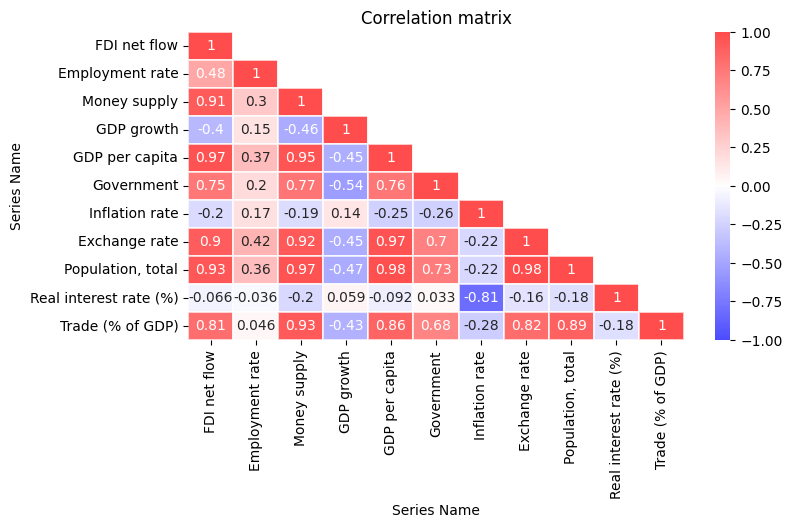

In [39]:
#correlation analysis_correlation coifficient (r)
regr_clean.corr().T.round(6)

#creating a corr matrix to visualize 
corr_matrix = regr_clean.corr(numeric_only= True)

#hidden half corner heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
 
#matrix
plt.figure(figsize= (8,4))
sns.heatmap(corr_matrix, vmin= -1,vmax= 1, cmap= 'bwr', annot= True, linewidths= 0.3, alpha= 0.7, mask = mask)
plt.title('Correlation matrix')
plt.show()

### Regression analysis with ANOVA

In [40]:
#model building _ set up variables
dependent_var = regr_clean['FDI net flow']
indepen_var= regr_clean[['Employment rate', 'Money supply', 'GDP growth','GDP per capita','Government', 'Inflation rate','Exchange rate','Population, total','Real interest rate (%)','Trade (% of GDP)']]

In [41]:
# Define the formula
formula = 'Q("FDI net flow") ~ Q("Employment rate") + Q("Money supply") + Q("GDP growth") + Q("GDP per capita") + Q("Government") + Q("Inflation rate") + Q("Exchange rate") + Q("Population, total") + Q("Real interest rate (%)") + Q("Trade (% of GDP)")'

# Define the model with ANOVA
model = ols(formula, data=regr_clean).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=1).round(6)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Employment rate"")",1.0,1.818955e+20,1.818955e+20,227.497224,0.000000
"Q(""Money supply"")",1.0,5.003273e+20,5.003273e+20,625.760718,0.000000
"Q(""GDP growth"")",1.0,1.690193e+18,1.690193e+18,2.113928,0.165299
"Q(""GDP per capita"")",1.0,5.396329e+19,5.396329e+19,67.492034,0.000000
"Q(""Government"")",1.0,1.389729e+18,1.389729e+18,1.738138,0.205937
"Q(""Inflation rate"")",1.0,1.038318e+17,1.038318e+17,0.129863,0.723288
"Q(""Exchange rate"")",1.0,1.725935e+19,1.725935e+19,21.586319,0.000269
"Q(""Population, total"")",1.0,2.635410e+17,2.635410e+17,0.329611,0.573871
"Q(""Real interest rate (%)"")",1.0,1.071301e+18,1.071301e+18,1.339879,0.264044
"Q(""Trade (% of GDP)"")",1.0,3.832777e+18,3.832777e+18,4.793664,0.043732


In [42]:
# Building regression model
X = sm.add_constant(indepen_var)        
model_6 = sm.OLS(dependent_var, indepen_var).fit()
model_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           FDI net flow   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              273.9
Date:                Fri, 01 Aug 2025   Prob (F-statistic):                    9.60e-17
Time:                        23:54:18   Log-Likelihood:                         -587.76
No. Observations:                  27   AIC:                                      1196.
Df Residuals:                      17   BIC:                                      1208.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Employment rate         1.075e+09   2.15e+08      5.009      0.000    6.22e+08    1.53e+09
Money supply           -1.281e+07   2.33e+07     -0.551      0.589   -6.19e+07    3.63e+07
GDP growth             -4.599e+08   1.81e+08     -2.546      0.021   -8.41e+08   -7.87e+07
GDP per capita          1.459e+07   1.58e+06      9.234      0.000    1.13e+07    1.79e+07
Government             -1.075e+07    5.2e+07     -0.207      0.838    -1.2e+08    9.89e+07
Inflation rate         -1.987e+08    8.4e+07     -2.367      0.030   -3.76e+08   -2.16e+07
Exchange rate          -2.871e+05   2.65e+05     -1.085      0.293   -8.45e+05    2.71e+05
Population, total      -1131.6355    229.025     -4.941      0.000   -1614.836    -648.435
Real interest rate (%) -3.252e+08   1.24e+08     -2.624      0.018   -5.87e+08   -6.37e+07
Trade (% of GDP)        6.905e+07   2.92e+07      2.369      0.030    7.55e+06    1.31e+08
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.417
Skew:                          -0.512   Prob(JB):                        0.492
Kurtosis:                       3.460   Cond. No.                     1.43e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R_square and Adjusted R_square

In [43]:
# Check the effectiveness of the model full of stacks (10 variables)
# R-squared
print("R-squared:", model.rsquared)

# Adjusted R-squared (accounts for number of predictors)
print("Adjusted R-squared:", model.rsquared_adj)

## P_value for model
print("p_value", model.f_pvalue)

R-squared: 0.9834844059243332
Adjusted R-squared: 0.9731621596270414
p_value 2.582702028961499e-12


In [44]:
# Create dictionary of model stats
model_stats = {
    "Model": 4,
    "R-squared": [model.rsquared],
    "Adjusted R-squared": [model.rsquared_adj],
    "F-test p-value": [model.f_pvalue]
}

# Convert to DataFrame
model_stats_df = pd.DataFrame(model_stats)
model_stats_df

,Model,R-squared,Adjusted R-squared,F-test p-value
0,4,0.983484,0.973162,2.582702e-12


In [45]:
# Define the dependent variable
dependent = 'Q("FDI net flow")'

# Define variables added step-by-step
base_vars = [
    'Q("Employment rate")',
    'Q("GDP per capita")',
    'Q("Population, total")',
    'Q("GDP growth")',
    'Q("Inflation rate")',
    'Q("Real interest rate (%)")',
    'Q("Trade (% of GDP)")'
]

# Stepwise additions
additional_vars = [
    'Q("Money supply")',
    'Q("Exchange rate")',
    'Q("Government")'
]

# Store model results
results = []

# Model 1: base only
for i in range(len(additional_vars) + 1):
    # Create the formula for each step
    current_vars = base_vars + additional_vars[:i]
    formula = f'{dependent} ~ {" + ".join(current_vars)}'
    model = ols(formula, data=regr_clean).fit()

    results.append({
        'Model': f'Model {i+1}',
        'Variables': ', '.join(current_vars),
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj,
        'p-value': model.f_pvalue
    })

# Convert to DataFrame and show result
results_df = pd.DataFrame(results)
print(results_df[['Model', 'R-squared', 'Adjusted R-squared', 'p-value']])


     Model  R-squared  Adjusted R-squared       p-value
0  Model 1   0.982956            0.976676  1.939082e-15
1  Model 2   0.983101            0.975591  2.361386e-14
2  Model 3   0.983436            0.974666  2.389717e-13
3  Model 4   0.983484            0.973162  2.582702e-12
